## Thresholding and Blurring

__Import dependencies__

In [185]:
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

__What we are going to do__

- Drawing shapes on images
- Creating masks
- Blurring images
- Thresholding

__Load image__

In [79]:
# Path
fname = os.path.join("..", "data", "img", "trex.png")

In [80]:
# Load image
image = cv2.imread(fname)

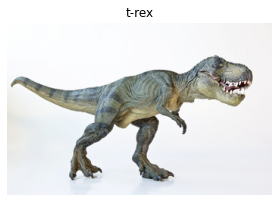

In [81]:
jimshow(image, "t-rex")

## Drawing

Drawing shapes on images is similar to working with masks.

__Draw rectangle__

When we draw on an image, the next time the image will still have the drawing on it. Below we are going to draw a rectangle on the image we just loaded. For that we are going to use this function:

```cv2.rectangle(image, start_point, end_point, color, thickness)```

Start_point: a coordinate point (height and width)
<br>
Thickness: number of pixels in width
<br>
color: RGB model (BGR in openCV)

In [50]:
cv2.rectangle(image, (50,200), (200, 225), (255,0,0), 1)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [226, 227, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [231, 232, 238]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [234, 235, 240]],

       ...,

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [242, 237, 236],
        [242, 237, 236],
        [242, 237, 236]],

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]],

       [[247, 242, 239],
        [247, 242, 239],
        [247, 242, 239],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]]

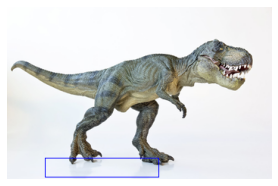

In [51]:
jimshow(image)
# Every time we call this image, the rectangle will be there. 
# To get rid of the shape, we have to reload the image. 

__Draw circle__

We could also draw a circle. For that we use this function:
    
```cv2.circle(image, center_coordinates, radius, color, thickness)```

center_coordinates: the center point of where we want to draw the circle.

radius: the radius of the circle in pixels.

color: representing in BGR-model (because of OpenCV)

thickness: represented in pixels

In [52]:
# Defining a tuple wiht
(centerX, centerY) = image.shape[1] // 2, image.shape[0] // 2
# When we are working with coordinates in openCV, height is [0] and [1] is width
# This is why we invert them

In [53]:
cv2.circle(image, (centerX, centerY), 50, (0,255,0), 1)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [226, 227, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [231, 232, 238]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [234, 235, 240]],

       ...,

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [242, 237, 236],
        [242, 237, 236],
        [242, 237, 236]],

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]],

       [[247, 242, 239],
        [247, 242, 239],
        [247, 242, 239],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]]

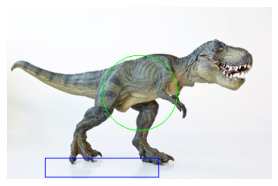

In [54]:
jimshow(image)
# Now we have a green circle in the middle of the circle 

In [55]:
# Draw another circle with a new center, radius, and color
cv2.circle(image, (270, 70), 30, (140,255,60), 3)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [226, 227, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [231, 232, 238]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [234, 235, 240]],

       ...,

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [242, 237, 236],
        [242, 237, 236],
        [242, 237, 236]],

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]],

       [[247, 242, 239],
        [247, 242, 239],
        [247, 242, 239],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]]

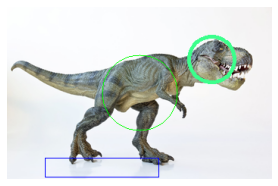

In [56]:
jimshow(image)

## Creating and using masks

When we create a mask, it is the same approach as drawing shapes on images. 

First we define an array of either 1s or 0s (in this case we are going to use 0s), which is going to be our mask. 

__Creating an array of 0s__

In [88]:
# Reload the image
image = cv2.imread(fname)

In [89]:
# Creating a mask, which is a numpy array of 0s. 
mask = np.zeros(image.shape[:2], dtype = "uint8") # we need to specify the values as integers because this is something numpy wants (numpy's default is float and we do not want to work with floats)

In [92]:
# Now we create a rectangle on the mask. 
# We specify a region of the mask and create the rectanngle on that region
# We set width to -1 which means that we fill the shape instead of defining the thickness
cv2.rectangle(mask, (100,100), (200,200), 255, -1)
# Now we have a mask that we can use to take information form the image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Now we are going to use the bitwise-& operation on the image.

```cv2.bitwise_and(input_image, output-image, mask)```

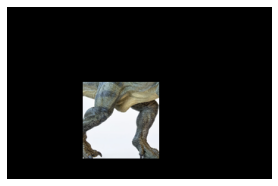

In [94]:
# Now we can use the bitwise-& operations to compare to values - if and only if the values are positive (not 0) then they get returned. If they are 0, then nothing is returned
# Hence, below we only return the values that are 1
# We apply bitwise-& on the image, and what is returned is the image and the mask is appliedl.
jimshow(cv2.bitwise_and(image, image, mask=mask))

## Group Task

How do we do a circular mask?

In [168]:
# Reload image
image = cv2.imread(fname)

In [169]:
# Create mask
mask = np.zeros(image.shape[:2], dtype = "uint8")

In [170]:
# Create the center of the circle as half the width half the height
(centerX, centerY) = (image.shape[1] // 2, image.shape[0]//2)

In [171]:
cv2.circle(mask, (centerX, centerY), 50, 255, -1)
# Why does the 255 value not matter? Because it is binary because we are working with a greysale image - it is either white/black
# Why -1? Becuase rather than defining the thickness of the circle (width) if we use -1 we fill the circle instead
# If we set the thickness to e.g. 1 we draw a circle with the thickness of 1 but that is not what we want to do - we want to fill the circle instead which is why we use -1 instead

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

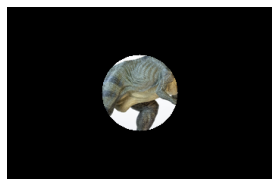

In [172]:
# Now we show the mask on the image
# Hence, we draw the circle (our mask) onto the image
jimshow(cv2.bitwise_and(image, image, mask=mask))
# Hence, we want to only return where the mask and the image is equal to 1 or 255, which is only the dinosaur and inside the circle - this is why everything else is black

## Blurring

__Average blur__

In [181]:
# The blur() methods takes two parameters (image and dimensions of the kernel)
blurred = cv2.blur(image, (3,3))

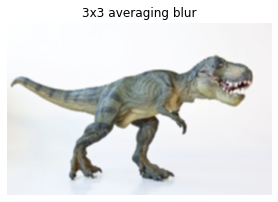

In [182]:
jimshow(blurred, "3x3 averaging blur")

__Comparing blurring methods__

We can compare the effects of blurring methods using the hstack() function, which is a horizontal stack. This is a way of stacking different kernel sizes horizontally so that we can compare them. Hstack() takes a list and stacks them horizontally.

In [187]:
# Now we are going to stack the different blurs in order to compare them
stacked = np.hstack([
    cv2.blur(image, (3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (7,7))
])

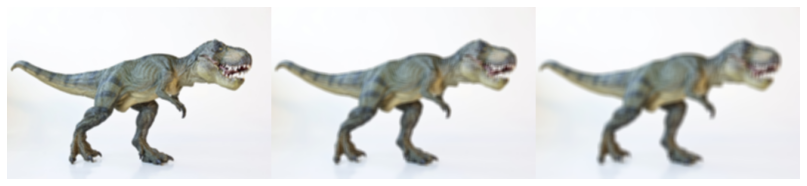

In [188]:
# Now we can see the different blurrings next to each other
jimshow(stacked)

## Thresholding

__Simple thresholding__

In [189]:
# Reloading image
image = cv2.imread(fname)

When doing threholding we work with greyscale images, because it becomes easier to see contrasts in the images. 

In [190]:
# Converting the image to greyscale with cvtColor() function form OpenCV
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

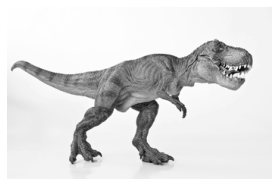

In [196]:
jimshow_channel(grey_image)

<function matplotlib.pyplot.show(close=None, block=None)>

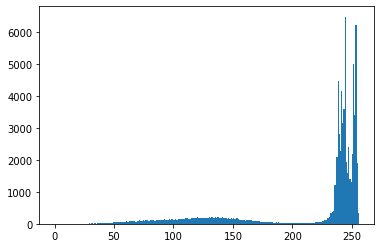

In [197]:
# Inspect the greyscale histogram of the image
plt.hist(grey_image.flatten(), 256, [0,256])
plt.show

We can see that most color intensities are at the higher end (255) because there is a lot of white background in the image. Based on this histogram, we can set a threshold. We know that the image contains a lot of white due to the white background, and therefore we set the threshold to 200

In [198]:
# First we blur the image with a 5x5 kernel
# We need the blurred image to define a threshold on after
blurred = cv2.blur(grey_image, (5,5))

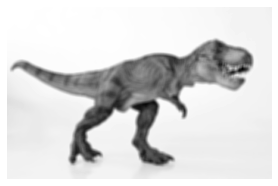

In [199]:
jimshow_channel(blurred)

We can see that we have blurred the image.

Now we can define a threshold. For that we use this  function: ```cv2.threshold(image, threshold_value, color, method)```

In [201]:
# We only want the second part of the ouput, which is the threshold array, which is why we split the output
(T_value, threshold) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
# 200 = threshold
# 255 (white) = what everything above the threshold will become. This means that everything below 200 will become black (0)

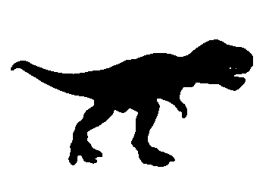

In [202]:
jimshow_channel(threshold)

In [205]:
# Now we use the exact same function but with a different method
# We get an inverted threshold now - this means that everything above 200 is black and everything below is white
(T_value, thresh_inverted) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)

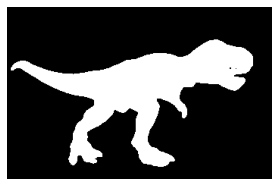

In [207]:
jimshow_channel(thresh_inverted)

Now we can use the bitwise_and operation on the inverted dinosaur

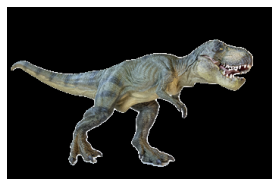

In [209]:
jimshow(cv2.bitwise_and(image, image, mask = thresh_inverted))

Now we have the dinosaur against a black background. 